In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from pmdarima import auto_arima
import statsmodels.api as sm
from fbprophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv("rul_hrs.csv")

### Discovering the data

In [4]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,rul
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.916667
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,285.900000
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,285.883333
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,285.866667
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,285.850000


In [5]:
df.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,rul
count,166441.000000,166441.000000,166441.000000,166441.000000,166441.000000,166441.000000,166441.000000,166441.000000,166441.000000,166441.000000,...,166441.000000,166441.000000,166441.000000,166441.000000,166441.000000,166441.000000,166441.000000,166441.000000,166441.000000,166441.000000
mean,83220.000000,2.348569,47.016965,50.628361,43.337738,577.716084,74.266212,13.097378,15.622506,15.006731,...,35.817003,43.271847,40.335053,41.135466,45.176190,43.245686,122.099804,52.637057,202.055026,288.629396
std,48047.522414,0.447107,3.424241,4.139904,2.584527,161.666372,19.456294,2.304404,2.447046,2.265047,...,11.316712,11.740656,8.555486,10.310476,13.649396,9.088286,63.938166,14.242712,119.694361,225.739648
min,0.000000,0.000000,22.439240,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.777779,0.000000
25%,41610.000000,2.404398,45.789930,50.130210,42.361110,624.884300,72.088920,13.288480,15.711810,15.147570,...,32.812500,39.062500,36.168980,36.458330,39.351850,38.773150,73.495370,46.585650,178.240700,99.066667
50%,83220.000000,2.455556,47.612850,51.649300,43.793400,631.712952,77.362460,13.527200,16.131360,15.292240,...,35.416660,42.187500,39.351850,39.351850,43.113430,41.956020,109.953700,50.925926,197.916700,226.250000
75%,124830.000000,2.497859,49.001740,52.951390,44.965275,636.921265,82.405220,13.809320,16.210940,15.617770,...,37.760410,45.833330,43.113430,43.113430,47.743060,46.006940,163.194400,56.134260,210.937500,445.383333
max,166440.000000,2.549016,55.772570,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,374.218800,408.593700,290.509200,231.481500,320.891200,220.486100,502.314800,458.622700,1000.000000,837.483333


In [6]:
df.rul.describe()

count    166441.000000
mean        288.629396
std         225.739648
min           0.000000
25%          99.066667
50%         226.250000
75%         445.383333
max         837.483333
Name: rul, dtype: float64

In [7]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166441 entries, 0 to 166440
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  166441 non-null  int64  
 1   timestamp   166441 non-null  object 
 2   sensor_00   166441 non-null  float64
 3   sensor_01   166441 non-null  float64
 4   sensor_02   166441 non-null  float64
 5   sensor_03   166441 non-null  float64
 6   sensor_04   166441 non-null  float64
 7   sensor_05   166441 non-null  float64
 8   sensor_06   166441 non-null  float64
 9   sensor_07   166441 non-null  float64
 10  sensor_08   166441 non-null  float64
 11  sensor_09   166441 non-null  float64
 12  sensor_10   166441 non-null  float64
 13  sensor_11   166441 non-null  float64
 14  sensor_12   166441 non-null  float64
 15  sensor_13   166441 non-null  float64
 16  sensor_14   166441 non-null  float64
 17  sensor_16   166441 non-null  float64
 18  sensor_17   166441 non-null  float64
 19  se

<ipython-input-7-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [8]:
df.shape

(166441, 53)

In [9]:
df.dtypes

Unnamed: 0      int64
timestamp      object
sensor_00     float64
sensor_01     float64
sensor_02     float64
sensor_03     float64
sensor_04     float64
sensor_05     float64
sensor_06     float64
sensor_07     float64
sensor_08     float64
sensor_09     float64
sensor_10     float64
sensor_11     float64
sensor_12     float64
sensor_13     float64
sensor_14     float64
sensor_16     float64
sensor_17     float64
sensor_18     float64
sensor_19     float64
sensor_20     float64
sensor_21     float64
sensor_22     float64
sensor_23     float64
sensor_24     float64
sensor_25     float64
sensor_26     float64
sensor_27     float64
sensor_28     float64
sensor_29     float64
sensor_30     float64
sensor_31     float64
sensor_32     float64
sensor_33     float64
sensor_34     float64
sensor_35     float64
sensor_36     float64
sensor_37     float64
sensor_38     float64
sensor_39     float64
sensor_40     float64
sensor_41     float64
sensor_42     float64
sensor_43     float64
sensor_44 

In [10]:
df.memory_usage().sum()/(1024*1024*1024)

0.06572446972131729

### Looking for missing values 

In [11]:
df.isnull().sum()

Unnamed: 0    0
timestamp     0
sensor_00     0
sensor_01     0
sensor_02     0
sensor_03     0
sensor_04     0
sensor_05     0
sensor_06     0
sensor_07     0
sensor_08     0
sensor_09     0
sensor_10     0
sensor_11     0
sensor_12     0
sensor_13     0
sensor_14     0
sensor_16     0
sensor_17     0
sensor_18     0
sensor_19     0
sensor_20     0
sensor_21     0
sensor_22     0
sensor_23     0
sensor_24     0
sensor_25     0
sensor_26     0
sensor_27     0
sensor_28     0
sensor_29     0
sensor_30     0
sensor_31     0
sensor_32     0
sensor_33     0
sensor_34     0
sensor_35     0
sensor_36     0
sensor_37     0
sensor_38     0
sensor_39     0
sensor_40     0
sensor_41     0
sensor_42     0
sensor_43     0
sensor_44     0
sensor_45     0
sensor_46     0
sensor_47     0
sensor_48     0
sensor_49     0
sensor_51     0
rul           0
dtype: int64

### Looking for duplicates

In [12]:
df.duplicated().value_counts()

False    166441
dtype: int64

### Looking for outliers

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'sensor_00'}>,
        <AxesSubplot:title={'center':'sensor_01'}>,
        <AxesSubplot:title={'center':'sensor_02'}>,
        <AxesSubplot:title={'center':'sensor_03'}>,
        <AxesSubplot:title={'center':'sensor_04'}>,
        <AxesSubplot:title={'center':'sensor_05'}>],
       [<AxesSubplot:title={'center':'sensor_06'}>,
        <AxesSubplot:title={'center':'sensor_07'}>,
        <AxesSubplot:title={'center':'sensor_08'}>,
        <AxesSubplot:title={'center':'sensor_09'}>,
        <AxesSubplot:title={'center':'sensor_10'}>,
        <AxesSubplot:title={'center':'sensor_11'}>,
        <AxesSubplot:title={'center':'sensor_12'}>],
       [<AxesSubplot:title={'center':'sensor_13'}>,
        <AxesSubplot:title={'center':'sensor_14'}>,
        <AxesSubplot:title={'center':'sensor_16'}>,
        <AxesSubplot:title={'center':'sensor_17'}>,
        <AxesSubplot:title={'center':'sensor_18'}>,
        <

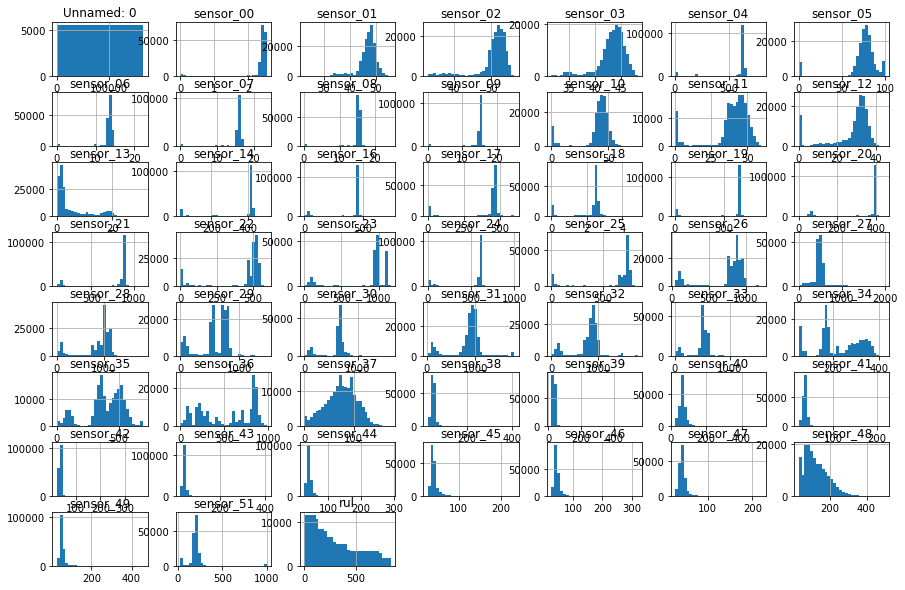

In [13]:
df.hist(bins=30, figsize=(15, 10))

### Looking for correlations

<AxesSubplot:>

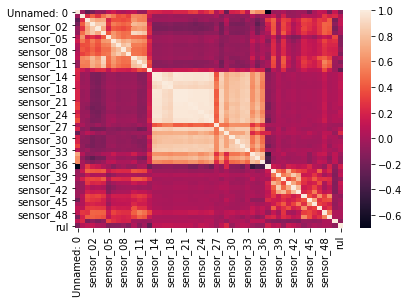

In [14]:
sns.heatmap(df.corr())

### Studying the target value over time

In [15]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18',
       'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23',
       'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28',
       'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33',
       'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38',
       'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43',
       'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48',
       'sensor_49', 'sensor_51', 'rul'],
      dtype='object')

In [16]:
df.timestamp = pd.to_datetime(df.timestamp)

<AxesSubplot:title={'center':'Evolution of RUL over time'}, xlabel='timestamp', ylabel='rul'>

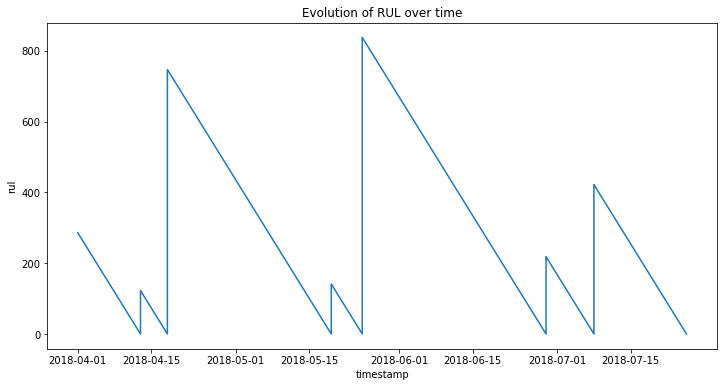

In [17]:
plt.figure(figsize=(12,6))
plt.title("Evolution of RUL over time")
# Line chart showing evolution of rul
sns.lineplot(x="timestamp", y="rul", data=df)
#plt.xticks(rotation=15)

In [20]:
df_ts = df[["timestamp","rul"]]

In [27]:
df_ts = df_ts.set_index("timestamp")

### Let's decompose the time series for more information

#### Assuming the time series is additive

In [40]:
decomposition = seasonal_decompose(df_ts,period =30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

<AxesSubplot:xlabel='timestamp'>

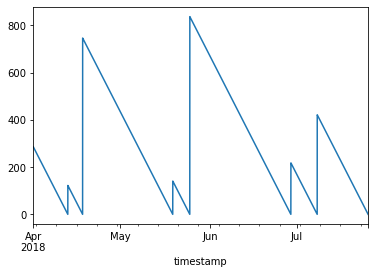

In [41]:
trend.plot()

<AxesSubplot:xlabel='timestamp'>

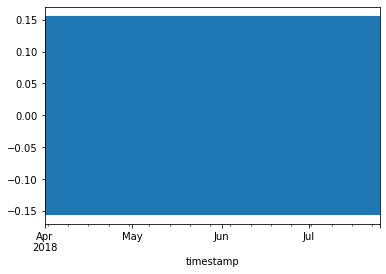

In [42]:
seasonal.plot()

<AxesSubplot:xlabel='timestamp'>

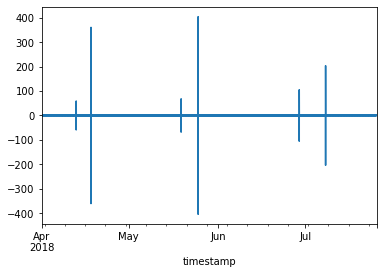

In [43]:
residual.plot()

In [38]:
df_ts.rul.describe()

count    166441.000000
mean        288.629396
std         225.739648
min           0.000000
25%          99.066667
50%         226.250000
75%         445.383333
max         837.483333
Name: rul, dtype: float64

#### Assuming the time series is multiplicative 

In [34]:
multiplicative_decomposition = seasonal_decompose(df_ts,model='multiplicative',period=12)
trend = multiplicative_decomposition.trend
seasonal = multiplicative_decomposition.seasonal
residual = multiplicative_decomposition.resid

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

### Studying the target value in general

<AxesSubplot:ylabel='Frequency'>

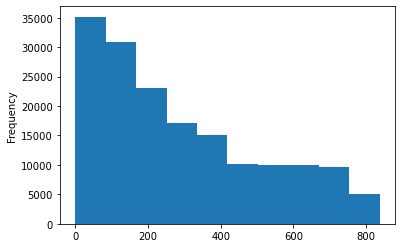

In [17]:
df.rul.plot.hist()